# $ Newsvendor\ Problem $
------

In this problem, a news vendor goes to the publisher every morning and buys $ q $ newspapers at a price of $ c $ per paper. This number is usually bounded above by some limit, representing either the news vendor’s purchase power or a limit set by the publisher to each vendor. The vendor then walks along the streets to sell as many newspapers as possible at the selling price $ p $. Any unsold newspaper can be returned to the publisher at a return price $ r $, with $ r < c $.

We are asked to help the news vendor decide how many newspapers to buy every
morning. Demand for newspapers varies over days and is described by a random
variable ξ .

$ \operatorname{E}[\text{Profit}]=\operatorname{E}[p\min(q,ξ) - r\max(q-ξ,0)]-cq $

### $ Problem\ data: $

* $selling\ \ price\ (p)     = 10$
* $buying\ \ price\ (c)     = 8$
* $returning\ \ price\ (r)     = 0$

In [1]:
%matplotlib inline 
# this first line only to keep plot in line with this notebook

import matplotlib.pyplot as plt
plt.style.use("ggplot") # plot style - more beautiful charts
import numpy as np
import pandas as pd

In [2]:
# problem data
venda = 10
compra = 8
devolucao = 0

# lot sizes
lotes = list(range(120,350 +1))

# simulation parameters
replics = 500
simuls  = 500

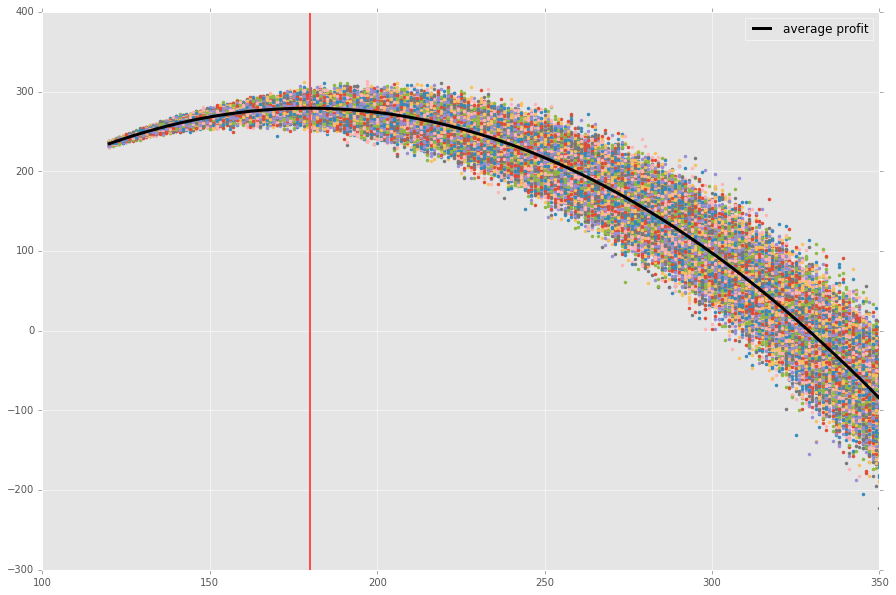

Economic order quantity:  180.0
Maximum expected profit:  279.0


In [3]:
xrep = [] # eixo X. Quantidade comprada
yrep = [] # eixo Y. Lucro médio da simulação

xaux = []
yaux = []

lucroPorLote = {i:[] for i in lotes}

plt.figure(figsize=(15,10), dpi=300)

for k in range(1,replics + 1):
    
    for i in lotes:
        lucromedio = 0
        lucrolist = []
        for j in range(1, simuls + 1):
            # random uniform demand from 100 to 500
            demanda = np.random.randint(100,500)
            
            comprei = i
            
            lucro = min(comprei,demanda)*venda - comprei*compra + max(comprei - demanda,0)*devolucao

            lucromedio += lucro/simuls
            
            lucrolist.append(lucro)
            
        lucroPorLote[i] = lucroPorLote[i] + lucrolist
            
        xrep.append(i)
        yrep.append(lucromedio)
        
    xaux.append(xrep)
    yaux.append(yrep)
    
    plt.plot(xrep,yrep, ".")
    
    xrep = []
    yrep = []
    
xmed = np.mean(np.array(xaux),axis=0)
ymed = np.mean(np.array(yaux),axis=0)

coefs = np.polyfit(xmed,ymed,2)
polyline = np.poly1d(coefs)
yfit = polyline(xmed)

# Estimanting economic order quantity and expected average profit
Eoq = xmed[np.argmax(ymed)]
LucMax = ymed[np.argmax(ymed)]

plt.axvline(x=Eoq, ymin=0, ymax = 1, linewidth=2, color='#ff4d4d')

plt.plot(xmed, yfit, linewidth = 3.0, color = "k", label = "average profit")

plt.legend(loc='best')

plt.show()

print("Economic order quantity: ", round(Eoq,2))
print("Maximum expected profit: ", round(LucMax))

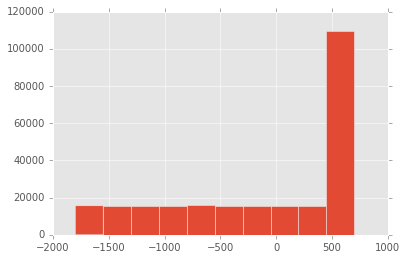

In [5]:
# print(lucroPorLote[170])

plt.hist(lucroPorLote[350], bins=10)

plt.show()

------
# Implementation for demand with beta distribution


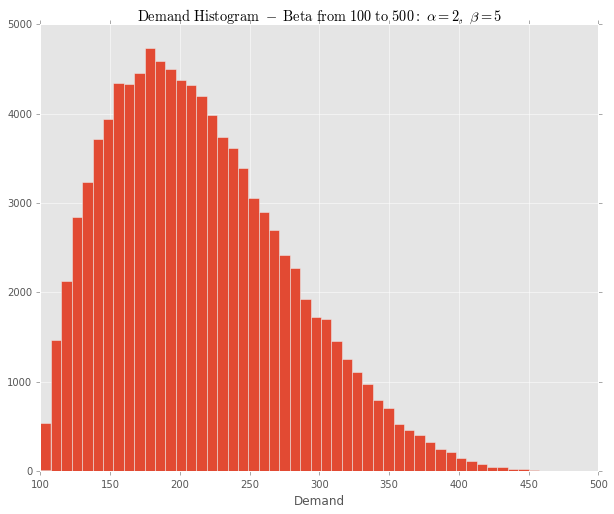

In [6]:
# Example of Beta distribution with parameters (a,b) = (2,5)
# min value = 100
# max value = 500

aa = 100 + np.random.beta(2,5,100000)*(500-100)

aa.round()

plt.figure(figsize=(10,8), dpi=300)

plt.xlabel("Demand")
plt.title(r'$\mathrm{Demand\ Histogram\ -\ Beta\ from\ 100\ to\ 500:}\ \alpha=2,\ \beta=5$')
plt.hist(aa, bins=50)

plt.show()

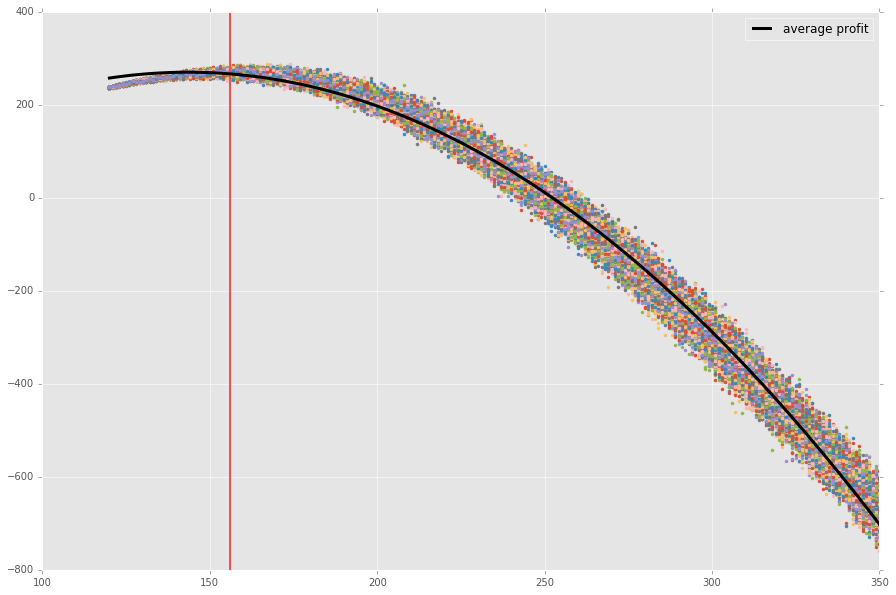

Economic order quantity:  156.0
Maximum expected profit:  270.0


In [7]:
xrep = [] # eixo X. Quantidade comprada
yrep = [] # eixo Y. Lucro médio da simulação

xaux = []
yaux = []

lucroPorLote = {i:[] for i in lotes}

plt.figure(figsize=(15,10), dpi=300)

for k in range(1,replics + 1):
    
    for i in lotes:
        lucromedio = 0
        lucrolist = []
        for j in range(1, simuls + 1):
            # random beta demand from 100 to 500
            demanda = int(100 + np.random.beta(2,5)*(500-100))
            
            comprei = i
            
            lucro = min(comprei,demanda)*venda - comprei*compra + max(comprei - demanda,0)*devolucao

            lucromedio += lucro/simuls
            
            lucrolist.append(lucro)
            
        lucroPorLote[i] = lucroPorLote[i] + lucrolist
            
        xrep.append(i)
        yrep.append(lucromedio)
        
    xaux.append(xrep)
    yaux.append(yrep)
    
    plt.plot(xrep,yrep, ".")
    
    xrep = []
    yrep = []
    
xmed = np.mean(np.array(xaux),axis=0)
ymed = np.mean(np.array(yaux),axis=0)

coefs = np.polyfit(xmed,ymed,2)
polyline = np.poly1d(coefs)
yfit = polyline(xmed)

# Estimanting economic order quantity and expected average profit
Eoq = xmed[np.argmax(ymed)]
LucMax = ymed[np.argmax(ymed)]

plt.axvline(x=Eoq, ymin=0, ymax = 1, linewidth=2, color='#ff4d4d')

plt.plot(xmed, yfit, linewidth = 3.0, color = "k", label = "average profit")

plt.legend(loc='best')

plt.show()

print("Economic order quantity: ", round(Eoq,2))
print("Maximum expected profit: ", round(LucMax))

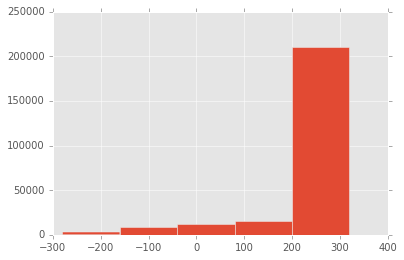

In [8]:

plt.hist(lucroPorLote[160], bins=5)

plt.show()

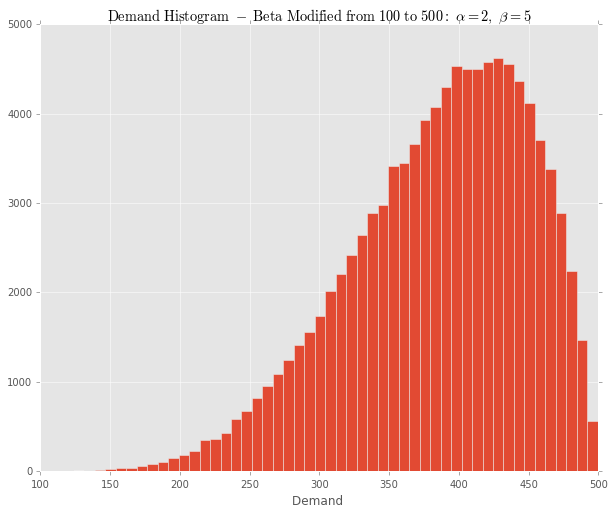

In [9]:
# Example of Beta distribution with parameters (a,b) = (2,5)
# min value = 100
# max value = 500

aa = 500 - np.random.beta(2,5,100000)*(500-100)

aa.round()

plt.figure(figsize=(10,8), dpi=300)

plt.xlabel("Demand ")
plt.title(r'$\mathrm{Demand\ Histogram\ -\ Beta\ Modified\ from\ 100\ to\ 500:}\ \alpha=2,\ \beta=5$')
plt.hist(aa, bins=50)

plt.show()

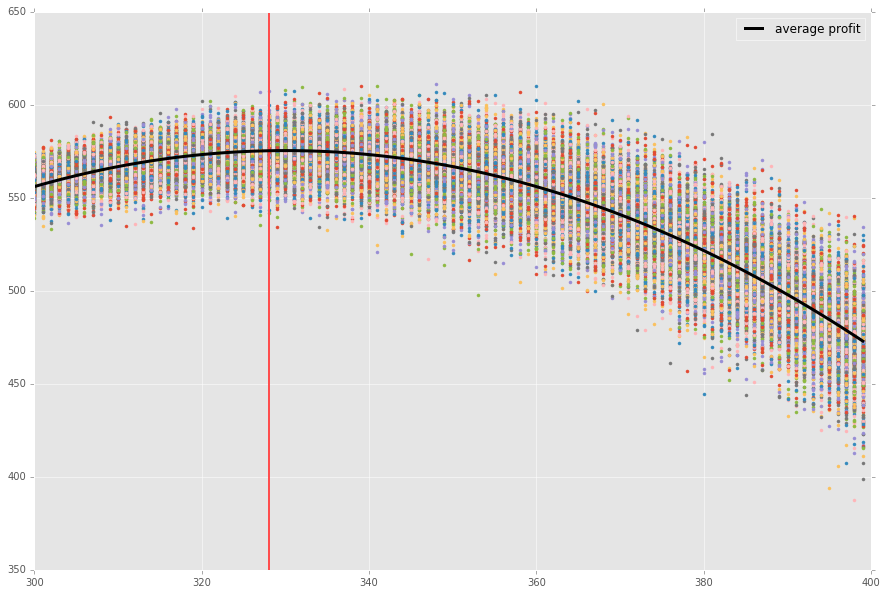

Economic order quantity:  328.0
Maximum expected profit:  574.0


In [10]:
xrep = [] # eixo X. Quantidade comprada
yrep = [] # eixo Y. Lucro médio da simulação

xaux = []
yaux = []

lotes = list(range(300,400))
lucroPorLote = {i:[] for i in lotes}

plt.figure(figsize=(15,10), dpi=300)

for k in range(1,replics + 1):
    
    for i in lotes:
        lucromedio = 0
        lucrolist = []
        for j in range(1, simuls + 1):
            # random reversed beta demand from 100 to 500
            demanda = int(500 - np.random.beta(2,5)*(500-100))
            
            comprei = i
            
            lucro = min(comprei,demanda)*venda - comprei*compra + max(comprei - demanda,0)*devolucao

            lucromedio += lucro/simuls
            
            lucrolist.append(lucro)
            
        lucroPorLote[i] = lucroPorLote[i] + lucrolist
            
        xrep.append(i)
        yrep.append(lucromedio)
        
    xaux.append(xrep)
    yaux.append(yrep)
    
    plt.plot(xrep,yrep, ".")
    
    xrep = []
    yrep = []
    
xmed = np.mean(np.array(xaux),axis=0)
ymed = np.mean(np.array(yaux),axis=0)

coefs = np.polyfit(xmed,ymed,2)
polyline = np.poly1d(coefs)
yfit = polyline(xmed)

# Estimanting economic order quantity and expected average profit
Eoq = xmed[np.argmax(ymed)]
LucMax = ymed[np.argmax(ymed)]

plt.axvline(x=Eoq, ymin=0, ymax = 1, linewidth=2, color='#ff4d4d')

plt.plot(xmed, yfit, linewidth = 3.0, color = "k", label = "average profit")

plt.legend(loc='best')

plt.show()

print("Economic order quantity: ", round(Eoq,2))
print("Maximum expected profit: ", round(LucMax))

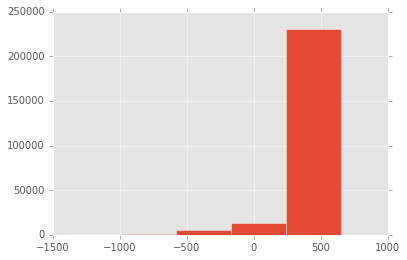

In [11]:

plt.hist(lucroPorLote[326], bins=5)

plt.show()